## Hyperparameter Analysis (FrozenLake-v1)

In [1]:
# imports
import gymnasium as gym
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.q_agent import QAgent
from src.loops_frozenlake import train_many_runs

env = gym.make("FrozenLake-v1", is_slippery=True)

In [2]:
# hyperparameters

alphas = [0.01, 0.1, 0.5, 1.0]
gammas = [0.1, 0.6, 0.9, 0.99]

epsilon = 0.1
n_runs = 10
n_episodes = 2000

In [3]:
results = pd.DataFrame()

for alpha in alphas:
    for gamma in gammas:
        print(f"Running alpha={alpha}, gamma={gamma}")

        mean_steps, mean_success = train_many_runs(
            QAgent,
            env,
            alpha, gamma,
            n_episodes,
            epsilon,
            n_runs
        )

        df = pd.DataFrame({
            "episode": range(n_episodes),
            "steps": mean_steps,
            "success_rate": mean_success,
            "alpha": alpha,
            "gamma": gamma,
            "hyperparams": [f"alpha={alpha}, gamma={gamma}"] * n_episodes
        })

        results = pd.concat([results, df])

Running alpha=0.01, gamma=0.1


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 3317.40it/s]


Running alpha=0.01, gamma=0.6


100%|██████████| 2000/2000 [00:00<00:00, 4079.04it/s]


Running alpha=0.01, gamma=0.9


100%|██████████| 2000/2000 [00:00<00:00, 4596.68it/s]


Running alpha=0.01, gamma=0.99


100%|██████████| 2000/2000 [00:00<00:00, 2121.64it/s]


Running alpha=0.1, gamma=0.1


100%|██████████| 2000/2000 [00:00<00:00, 4442.20it/s]


Running alpha=0.1, gamma=0.6


100%|██████████| 2000/2000 [00:00<00:00, 2952.76it/s]


Running alpha=0.1, gamma=0.9


100%|██████████| 2000/2000 [00:00<00:00, 3798.80it/s]


Running alpha=0.1, gamma=0.99


100%|██████████| 2000/2000 [00:00<00:00, 4104.96it/s]


Running alpha=0.5, gamma=0.1


100%|██████████| 2000/2000 [00:00<00:00, 4111.14it/s]


Running alpha=0.5, gamma=0.6


100%|██████████| 2000/2000 [00:00<00:00, 3577.14it/s]


Running alpha=0.5, gamma=0.9


100%|██████████| 2000/2000 [00:00<00:00, 4258.83it/s]


Running alpha=0.5, gamma=0.99


100%|██████████| 2000/2000 [00:00<00:00, 3706.15it/s]


Running alpha=1.0, gamma=0.1


100%|██████████| 2000/2000 [00:00<00:00, 3658.19it/s]


Running alpha=1.0, gamma=0.6


100%|██████████| 2000/2000 [00:00<00:00, 4071.13it/s]


Running alpha=1.0, gamma=0.9


100%|██████████| 2000/2000 [00:00<00:00, 3035.81it/s]


Running alpha=1.0, gamma=0.99


100%|██████████| 2000/2000 [00:00<00:00, 3066.57it/s]


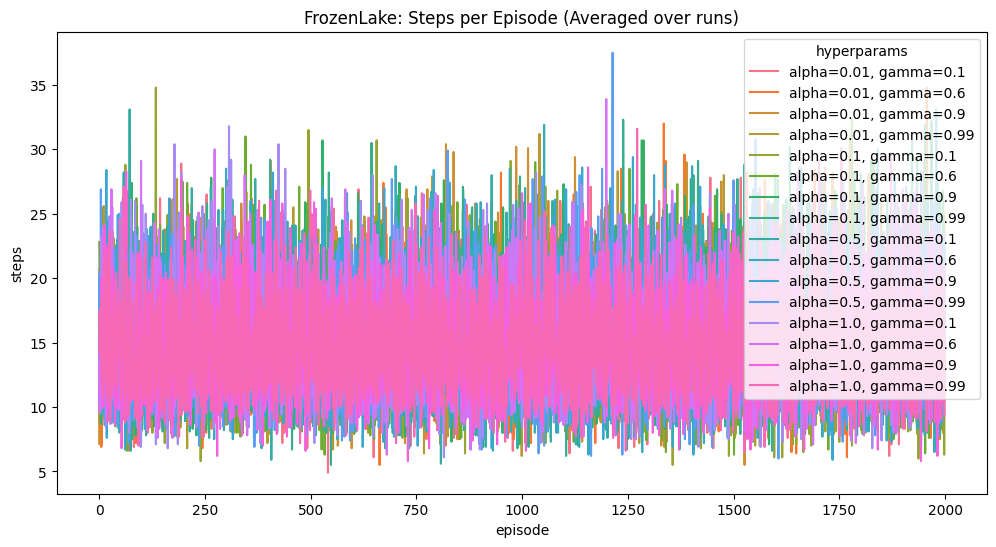

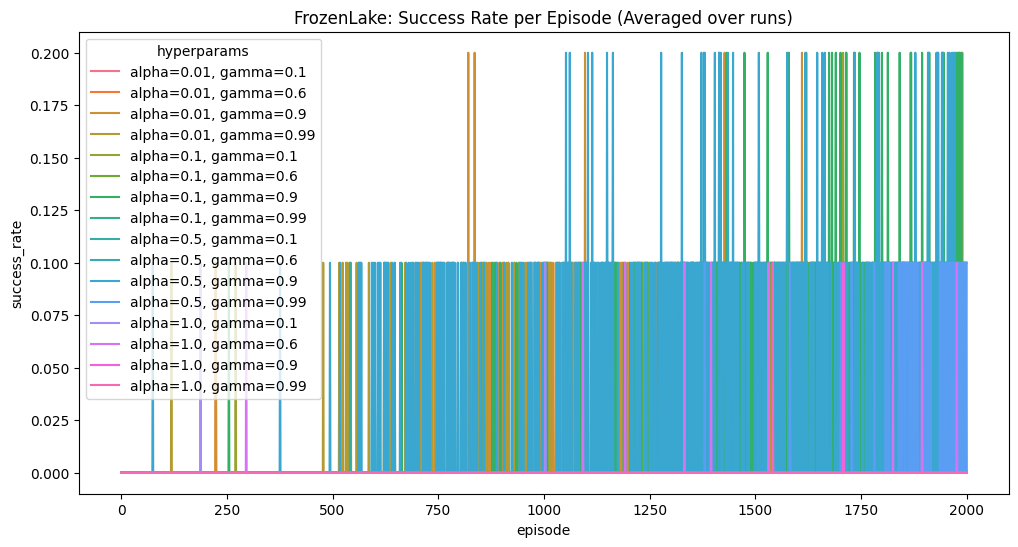

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x="episode", y="steps", hue="hyperparams")
plt.title("FrozenLake: Steps per Episode (Averaged over runs)")
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x="episode", y="success_rate", hue="hyperparams")
plt.title("FrozenLake: Success Rate per Episode (Averaged over runs)")
plt.show()